<a href="https://colab.research.google.com/github/fedemoss/HelmholtzCage/blob/main/Bobinas_desalineadas_en_ejes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El objetivo de este código es estudiar como varía la homogeneidad para un par de bobinas cuadradas y circulares al perder su coaxialidad**

In [ ]:
import math
import numpy as np
from scipy.integrate import quad
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt

In [ ]:
## Constantes:
## Todo está en SI

N = 40  ## número de vueltas 
I = 1   ## corriente
u0 = 1.256637062* 10 ** (-6)  ## permeabilidad magnética del vacío
C = u0 * N * I / (4 * np.pi)

**DEFINICIÓN CAMPO DE JAULA CIRCULAR (ES PARA UN PAR CON SEPARACIÓN D, HAY QUE INTEGRAR ESTAS EXPRESIONES)**

In [ ]:
## Término que aparece en común a todos los campos

def terminoDivisorup(u, z, x, y, r, d):
    return ((z + d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2)
  
def terminoDivisordown(u, z, x, y, r, d):
    return ((z - d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2) 

## Campo en la dirección axial (eje z) para las dos bobinas en cartesianas (Bz)

def dBzup(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (r - x * cos(u) - y * sin(u)) / terminoDivisorup(u, z, x, y, r, d)

def dBzdown(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (r - x * cos(u) - y * sin(u)) / terminoDivisordown(u, z, x, y, r, d) 

## Componente x del campo (par de bobinas)

def dBxup(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z + d/2) * cos(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBxdown(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z - d/2) * cos(u)/terminoDivisordown(u, z, x, y, r, d)

## Componente y del campo (par de bobinas)

def dByup(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z + d/2) * sin(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBydown(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z - d / 2) * sin(u)/terminoDivisordown(u, z, x, y, r, d)  

**DEFINICIÓN DE CAMPO DE JAULA CUADRADA EN EL EJE AXIAL (PARA UN PAR CON SEPARACIÓN D)**



In [ ]:
## Campo en el eje axial en cartesianas (Bz)
## La expresión es muy grande por lo tanto la separamos en varias partes
## bobinas a d/2 y -d/2 en el eje z con respecto al centro

def SBz1up(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2up(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3up(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z + d / 2) ** 2)     ## ojo acá
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4up(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Esta es la función que importa

def SBzup(z, x, y, l, d):
    return SBz1up(z, x, y, l, d) - SBz2up(z, x, y, l, d) + SBz3up(z, x, y, l, d) - SBz4up(z, x, y, l, d)

## Campo en el eje axial para la otra bobina

def SBz1down(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2down(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3down(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4down(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es la otra función que importa

def SBzdown(z, x, y, l, d):
    return SBz1down(z, x, y, l, d) - SBz2down(z, x, y, l, d) + SBz3down(z, x, y, l, d) - SBz4down(z, x, y, l, d)

**Cálculo de las variaciones de la homogeneidad para la circular**

In [ ]:
## ERROR DE CONSTRUCCIÓN: no coaxialidad a lo largo de y e x [CIRCULAR]

r = 0.5  # radio de la bobina
d = r    # distancia ideal
dy = np.linspace(0, 0.05, 50)  # Nos vamos a mover hasta 5cm con respecto del eje y
dx = np.linspace(0, 0.05, 50)  # ""  "" con respecto del eje x
dimensiony = 1  # tamaño del cubesat
dimensionx = 1
dimensionz = 1
x = dimensionx/20  # borde del Cubesat (5cm)
y = dimensiony/20  # borde del CubeSat (5cm)
z = np.linspace(0, dimensionz / 20, 200) # vamos a ver desde el punto (x, y, 0) hasta el borde del CubeSat (x, y, 5cm)
Bzcirclez = np.zeros(len(z))  # array para el campo en z, variando en z  "" ""
HomogeneidadCx = np.zeros(len(dx))  # array donde se guardan la homogeneidad para cada variación dx
HomogeneidadCy = np.zeros(len(dy))  # "" "" para cada variación dy

## Lo que hacemos es desfasar a alguna de las bobinas en dy, y luego iteramos en los valores de z
## para calcular el campo en el eje axial posicionado en (x, y + dy). Por último, calculamos 
## el campo en el centro y tomamos el máximo de la homogeneidad (que lo guaradamos en el array HomogeneidadCx)

for h in range(len(dy)):
  for i in range(len(z)):
    # calculamos el campo en z usando cuadraturas
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, y + dy[h], r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], x, y, r, d))
    Bzcirclez[i] = (Lz[0] + Lz[2]) * 10 ** 6
  # campo en el centro
  Lz0y = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0 + dy[h], r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0y = (Lz0y[0] + Lz0y[2]) * 10 ** 6
  # tomamos el máximo, esa es la homogeneidad
  HomogeneidadCx[h] = max(abs(Bzcirclez - Bz0y) / abs(Bz0y)) * 10 ** 6

## Lo mismo que antes pero variando en dx una de las bobinas.

for h in range(len(dx)):
  for i in range(len(z)):
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x + dx[h], y, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], x, y, r, d))
    Bzcirclez[i] = (Lz[0] + Lz[2]) * 10 ** 6
  Lz0x = quad(dBzup, 0, 2*np.pi, args=(0, 0 + dx[h], 0, r, d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0x = (Lz0x[0] + Lz0x[2]) * 10 ** 6
  HomogeneidadCy[h] = max(abs(Bzcirclez - Bz0x) / abs(Bz0x)) * 10 ** 6



**Cálculo de las variaciones de homogeneidad para la cuadrada**

In [ ]:
#ERROR DE CONSTRUCCIÓN: no coaxialidad a lo largo de y e x [CUADRADA]

l = 1  # largo de la bobina
d = 0.5445 * l # distancia ideal
dy = np.linspace(0, 0.05, 50) #  Nos vamos a mover hasta 5cm con respecto del eje y
dx = np.linspace(0, 0.05, 50) #  "" "" hasta 5cm con respecto del eje x
dimensiony = 1  # dimensiones del CubeSat
dimensionx = 1
dimensionz = 1
x = dimensionx/20  # borde del Cubesat (5cm)
y = dimensiony/20  # borde del CubeSat (5cm)
z = np.linspace(0, dimensionz / 20, 200) # vamos a ver desde el punto (x, y, 0) hasta el borde del CubeSat (x, y, 5cm)
Bzsquarez = np.zeros(len(z))  # array para el campo en z, variando en z
HomogeneidadSx = np.zeros(len(dx))  # array donde se guardan la homogeneidad para cada variación dx
HomogeneidadSy = np.zeros(len(dy))  # "" "" para cada variación en dy

## Lo mismo que el loop para la circular para dx,con la diferencia que no hay que integrar (se evalua directamente)

for h in range(len(dx)):
  for i in range(len(z)):
    # cálculo del array del campo
    Bzsquarez[i] = SBzdown(z[i], x, y, l, d) + SBzup(z[i], x + dx[h], y, l, d)   
  # Campo en el centro
  Bz0 = SBzdown(0, 0, 0, l, d) + SBzup(0, dx[h], 0, l, d)
  # Cálculo de la homogeneidad
  HomogeneidadSx[h] = max(abs(Bzsquarez - Bz0) / abs(Bz0)) * 10 ** 6  

#Lo mismo que antes pero para dy

for h in range(len(dy)):
  for i in range(len(z)):
      Bzsquarez[i] = SBzdown(z[i], x, y, l, d) + SBzup(z[i], x, y + dy[h], l, d)
  Bz0 = SBzdown(0, 0, 0, l, d) + SBzup(0, 0, dy[h], l, d)
  HomogeneidadSy[h] = max(abs(Bzsquarez - Bz0) / abs(Bz0)) * 10 ** 6

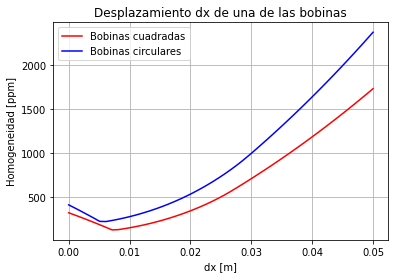

In [ ]:
## gráfico de la homogeneidad en función del desplazamiento dx
## Si en el código anterior se elije otro borde del cubesat (-5cm, -5cm)
## se obtiene un gráfico distinto (el otro que aparece en el informe)

plt.plot(dx, HomogeneidadSx,'red')
plt.plot(dx, HomogeneidadCx,'blue')
plt.xlabel('dx [m]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Bobinas cuadradas', 'Bobinas circulares'])
plt.title('Desplazamiento dx de una de las bobinas')
plt.grid()
plt.show()

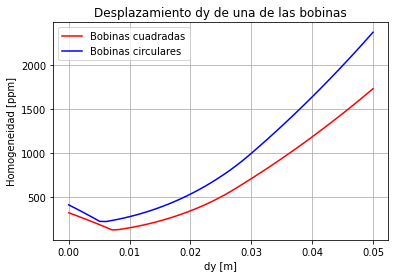

In [ ]:
# gráfico de la homogeneidad en función del desplazamiento en y

plt.plot(dy, HomogeneidadSy,'red')
plt.plot(dy, HomogeneidadCy,'blue')
plt.xlabel('dy [m]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Bobinas cuadradas', 'Bobinas circulares'])
plt.title('Desplazamiento dy de una de las bobinas')
plt.grid()
plt.show()